In [ ]:
#Required library
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,classification_report
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
# Get folders from drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths to CSV files (Data set) that i uploaded it on my drive
csv_files = [
    '/content/drive/MyDrive/archive/stories_art-et-culture.csv',
    '/content/drive/MyDrive/archive/stories_economie.csv',
    '/content/drive/MyDrive/archive/stories_faits-divers.csv',
    '/content/drive/MyDrive/archive/stories_marocains-du-monde.csv',
    '/content/drive/MyDrive/archive/stories_medias.csv',
    '/content/drive/MyDrive/archive/stories_orbites.csv',
    '/content/drive/MyDrive/archive/stories_politique.csv',
    '/content/drive/MyDrive/archive/stories_regions.csv',
    '/content/drive/MyDrive/archive/stories_societe.csv',
    '/content/drive/MyDrive/archive/stories_sport.csv',
    '/content/drive/MyDrive/archive/stories_tamazight.csv',
]

# Create an empty list to store data frames
data_frames = []

# Read each CSV file and store its data frame in the list
for file in csv_files:
    df = pd.read_csv(file)
    data_frames.append(df)

# Concatenate the data frames along the rows (axis=0)
concatenated_df = pd.concat(data_frames, axis=0)

# Display the resulting data frame
print(concatenated_df)


     Unnamed: 0                                id  \
0             0  f06aa998054e11eba66e646e69d991ea   
1             1  f1cf1b9c054e11ebb718646e69d991ea   
2             2  f2d282a4054e11eb800f646e69d991ea   
3             3  f3f46cac054e11eba403646e69d991ea   
4             4  f50f0476054e11eba31b646e69d991ea   
..          ...                               ...   
995         995  75b0b940055811ebb2ff646e69d991ea   
996         996  775c3440055811ebbc60646e69d991ea   
997         997  78fea9ba055811eb9e32646e69d991ea   
998         998  7a58d38c055811ebb9c9646e69d991ea   
999         999  7b769274055811eba13c646e69d991ea   

                                                 title  \
0       "بيت الشعر" يسائل وزير الثقافة عن كوابيس سوداء   
1         مهرجان "سينما المؤلّف" يستحضر روح ثريا جبران   
2    فيلم "بدون عنف" لهشام العسري .."كعب الحذاء ووا...   
3    "تنين ووهان" .. مريم أيت أحمد توقِّع أولى "روا...   
4          مسكر يتخلّى عن دعم "الوزارة" بسبب "الجمهور"   
..             

In [ ]:
# save the concatenated data to a new CSV file called - Dataset
concatenated_df.to_csv('Dataset.csv', index=False)


In [ ]:
# read the dataset (after concatenated data to a new CSV)
dataSet=pd.read_csv('Dataset.csv')
dataSet.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [ ]:
# Check the data types of each column
print(dataSet.dtypes)

Unnamed: 0     int64
id            object
title         object
date          object
author        object
story         object
topic         object
dtype: object


In [ ]:
dataSet.describe()

,Unnamed: 0
count,11000.000000
mean,499.500000
std,288.688113
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [ ]:
# check the nulls values
dataSet.isnull().sum()

Unnamed: 0    0
id            0
title         0
date          0
author        0
story         0
topic         0
dtype: int64

In [ ]:
# show duplicated rows
duplicated_rows = dataSet[dataSet.duplicated()]
num_duplicated_rows = len(duplicated_rows)

print("Number of duplicated rows:", num_duplicated_rows)

Number of duplicated rows: 0


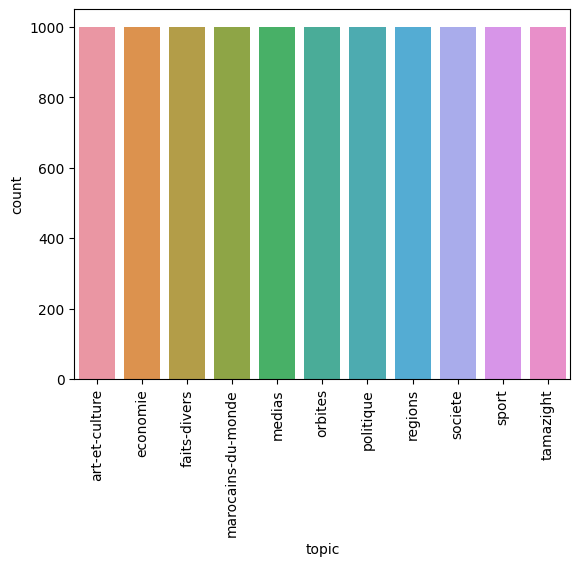

In [ ]:
# Plot the distribution of 'topic' column
sns.countplot(x='topic', data=dataSet)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Required library i used it to count number of letters in show the Graphs
!pip install letter
!pip install reportlab.lib.pagesizes

ERROR: Could not find a version that satisfies the requirement reportlab.lib.pagesizes (from versions: none)
ERROR: No matching distribution found for reportlab.lib.pagesizes


In [ ]:
# Number of examples per class
class_counts = dataSet['topic'].value_counts()

# get_top_ngrams

def get_top_ngrams(corpus, n=1, num_ngrams=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:num_ngrams]

# Apply the function on the 'story' column
top_unigrams = get_top_ngrams(dataSet['story'], n=1, num_ngrams=10)

# Lengths of examples (word and letters)
dataSet['word_count'] = dataSet['story'].apply(lambda x: len(str(x).split()))
dataSet['letter_count'] = dataSet['story'].apply(lambda x: len(str(x)))

# Output tables
print("Insight 1: Number of examples per class")
print(class_counts)

print("\nInsight 2: Top frequent unigrams")
print(pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency']))

print("\nInsight 3: Lengths of examples")
print(dataSet[['word_count', 'letter_count']])


Insight 1: Number of examples per class
art-et-culture        1000
economie              1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
orbites               1000
politique             1000
regions               1000
societe               1000
sport                 1000
tamazight             1000
Name: topic, dtype: int64

Insight 2: Top frequent unigrams
  Unigram  Frequency
0      في     130582
1      من     105589
2     على      60808
3      أن      60166
4     إلى      53806
5    التي      33066
6      عن      25230
7      ما      20143
8    الذي      19082
9      مع      17956

Insight 3: Lengths of examples
       word_count  letter_count
0             622          3868
1             381          2464
2             516          3056
3             771          4921
4             200          1238
...           ...           ...
10995        1255          7773
10996         241          1486
10997         328          2113
10998         597   

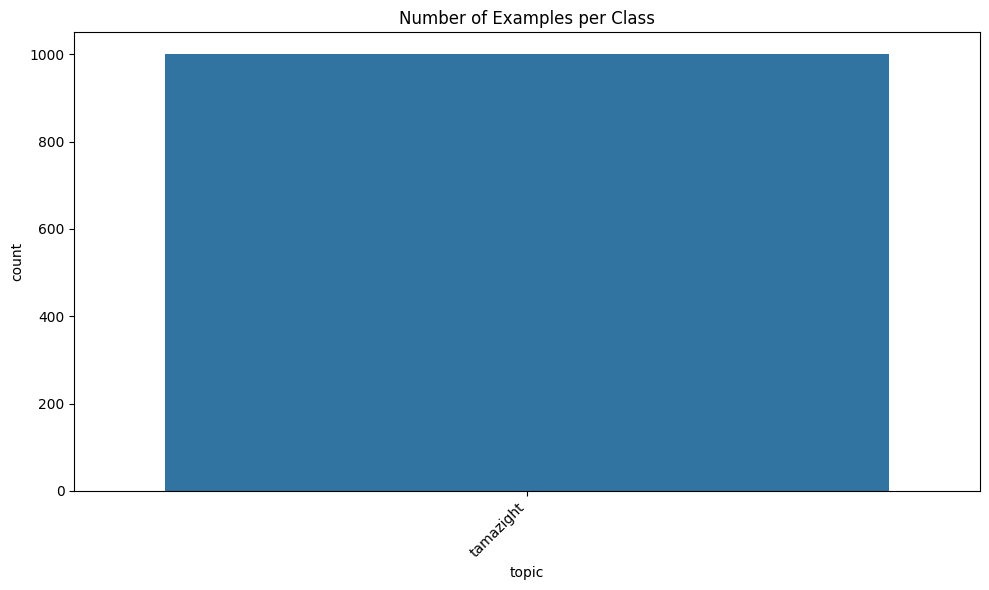

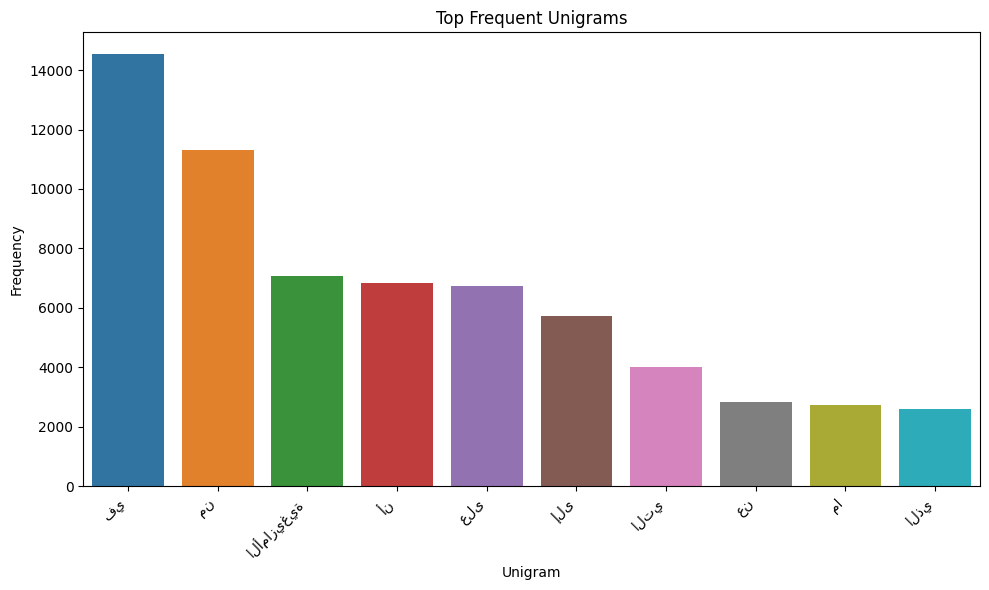

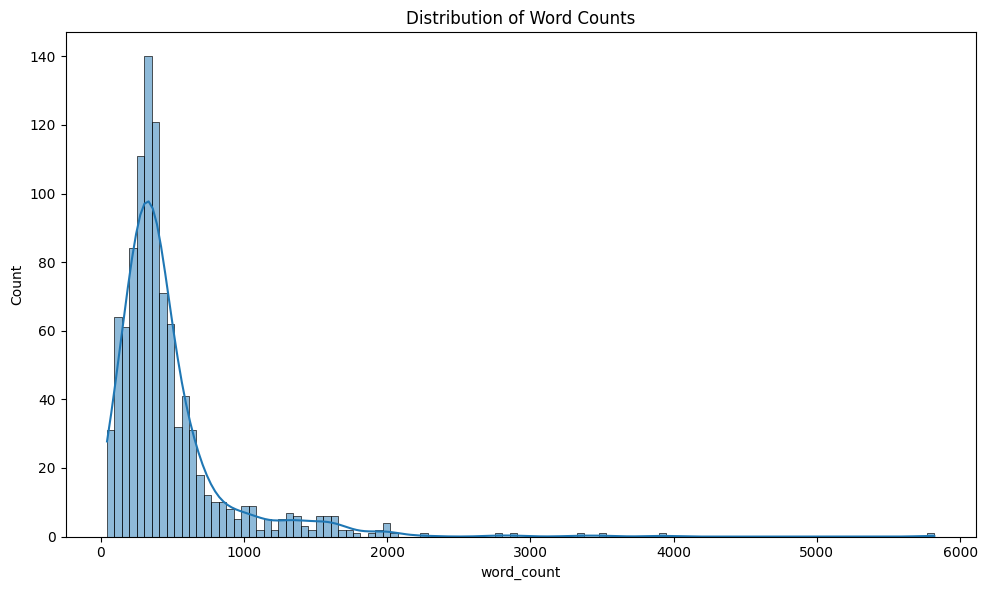

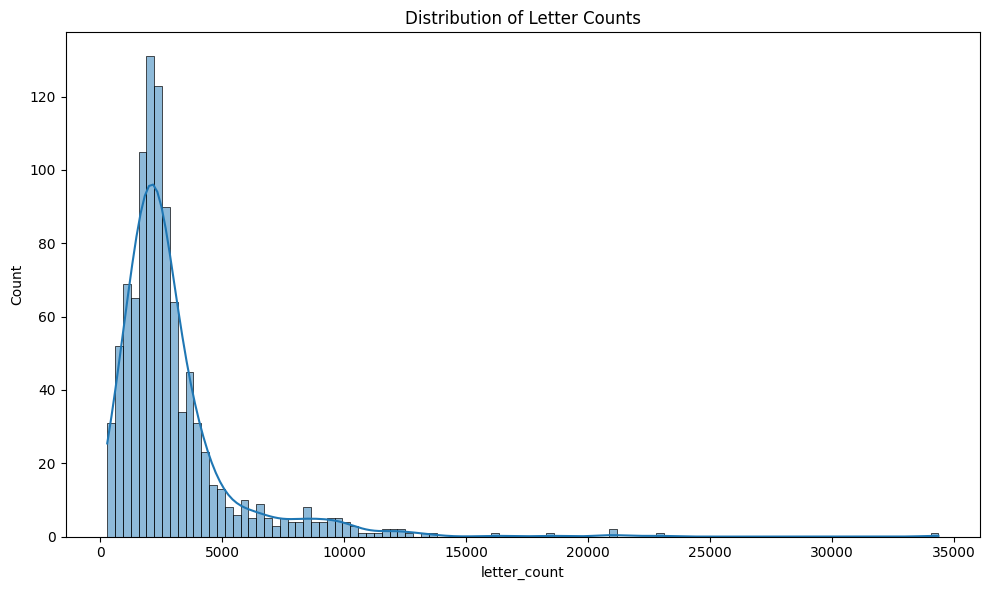

In [ ]:


# Set the font family for Arabic text
plt.rcParams['font.family'] = 'DejaVu Sans'



# 1. Number of examples per class
class_counts = df['topic'].value_counts()

# 2. Insight: Top frequent unigrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=1, num_ngrams=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:num_ngrams]

# Apply the function on the 'story' column
top_unigrams = get_top_ngrams(df['story'], n=1, num_ngrams=10)

# 3. Insight: Lengths of examples
df['word_count'] = df['story'].apply(lambda x: len(str(x).split()))
df['letter_count'] = df['story'].apply(lambda x: len(str(x)))

# Chart 1: Number of examples per class
plt.figure(figsize=(10, 6))
sns.countplot(x='topic', data=df, order=df['topic'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right for better readability
plt.title('Number of Examples per Class')
plt.tight_layout()
plt.savefig('number_of_examples_per_class.png')
plt.show()

# Chart 2: Top frequent unigrams
plt.figure(figsize=(10, 6))
df_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])
sns.barplot(x='Unigram', y='Frequency', data=df_unigrams)
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right
plt.title('Top Frequent Unigrams')
plt.tight_layout()
plt.savefig('top_frequent_unigrams.png')
plt.show()

# Chart 3: Distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.tight_layout()
plt.savefig('distribution_of_word_counts.png')
plt.show()

# Chart 4: Distribution of letter counts
plt.figure(figsize=(10, 6))
sns.histplot(df['letter_count'], kde=True)
plt.title('Distribution of Letter Counts')
plt.tight_layout()
plt.savefig('distribution_of_letter_counts.png')
plt.show()


In [ ]:
!pip install python-bidi

In [ ]:
!pip install --upgrade arabic-reshaper

In [ ]:
import bidi.algorithm
import arabic_reshaper


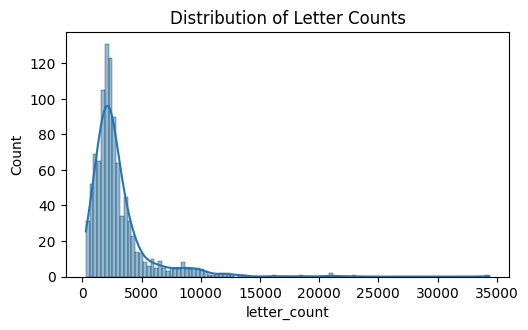

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from arabic_reshaper import reshape

# Choose a font that supports Arabic characters
plt.rcParams['font.family'] = 'Arial'

# Load the dataset (uncomment this line if you have the dataset)
# df = pd.read_csv("Dataset.csv")

# 1. Insight: Number of examples per class
class_counts = df['topic'].value_counts()

# 2. Insight: Top frequent unigrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=1, num_ngrams=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:num_ngrams]

# Apply the function on the 'story' column
top_unigrams = get_top_ngrams(df['story'], n=1, num_ngrams=10)

# 3. Insight: Lengths of examples
df['word_count'] = df['story'].apply(lambda x: len(str(x).split()))
df['letter_count'] = df['story'].apply(lambda x: len(str(x)))

# Charts
plt.figure(figsize=(10, 6))

# # Chart 1: Number of examples per class -
# plt.subplot(2, 2, 1)
# sns.countplot(x='topic', data=df, order=df['topic'].value_counts().index)
# plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right for better readability
# plt.title('Number of Examples per Class')

# Chart 2: Top frequent unigrams
plt.subplot(2, 2, 2)
df_unigrams = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])
df_unigrams['Unigram'] = df_unigrams['Unigram'].apply(lambda x: get_display(reshape(x)))
sns.barplot(x='Unigram', y='Frequency', data=df_unigrams)
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right
plt.title('Top Frequent Unigrams')

# Set the text direction to RTL for y-axis labels (bars) in the Top Frequent Unigrams chart
for item in plt.gca().get_yticklabels():
    item.set_text(item.get_text()[::-1])

# Chart 3: Distribution of word counts
plt.subplot(2, 2, 3)
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts')

# Chart 4: Distribution of letter counts
plt.subplot(2, 2, 4)
sns.histplot(df['letter_count'], kde=True)
plt.title('Distribution of Letter Counts')

plt.tight_layout()
plt.show()

In [ ]:
!pip install nltk
import nltk

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')

# Shuffle the DataFrame using the sample function with frac=1 (100% of rows)
df = pd.read_csv("Dataset.csv")

df = df.sample(frac=1).reset_index(drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,Unnamed: 0,id,title,date,author,story,topic
0,159,ccfcfe8804dd11eb96c0646e69d991ea,تنفيذ مضامين خطاب العرش يستنفر الحكومة لمواجهة...,الأحد 09 غشت 2020 - 23:00,هسبريس من الرباط,تسارع حكومة العثماني لتنفيذ تعليمات الملك محمد...,politique
1,136,ba5b07ee04e911eb91a5646e69d991ea,اتحاد المقاولات يوصي بفتح الحدود وإحداث تعويض ...,الخميس 10 شتنبر 2020 - 07:00,هسبريس - يوسف لخضر,دعا الاتحاد العام لمقاولات المغرب (CGEM)، الذي...,economie
2,603,337ddbf6055b11ebbccb646e69d991ea,"حملة انتقادات تلاحق عصيد بشأن علاقة ""كورونا"" ب...",الأربعاء 22 أبريل 2020 - 08:00,هسبريس من الرباط,جدل كبير رافق التصريح الذي أدلى به الناشط الأم...,orbites
3,44,057e4a0004e511eb8bb0646e69d991ea,خبراء: التدابير الوقائية أفضل لقاح لمواجهة انت...,الاثنين 28 شتنبر 2020 - 16:00,هسبريس - مصطفى شاكري,لا تزال الوضعية الصحية المُسجلة مؤخّرًا تثير ا...,societe
4,795,48a5591004e011eb85bb646e69d991ea,"بوريطة: بيانات ""خارجية الجزائر"" دليل تورط الجا...",الخميس 23 يناير 2020 - 21:00,هسبريس من العيون,وجّه ناصر بوريطة، وزير الشؤون الخارجية والتعاو...,politique
...,...,...,...,...,...,...,...
10995,679,0e1cbaa4055f11eb91fa646e69d991ea,مولودية وجدة يرغب في تمديد عقد المدرب بنشيخة,الخميس 21 ماي 2020 - 08:20,هسبورت - حمزة اشتيوي,فتح مسؤولو فريق مولودية وجدة لكرة القدم باب ال...,sport
10996,944,e91fe2c004e011ebb032646e69d991ea,"لهجة بنكيران الجديدة .. ""حربائية المكاسب"" والد...",الاثنين 16 دجنبر 2019 - 16:00,هسبريس - عبد السلام الشامخ (كاريكاتير: عماد ال...,صعَّدَ عبد الإله بنكيران، رئيس الحكومة السابق،...,politique
10997,240,cc4a9092055411eb8e54646e69d991ea,احتفال مغربي بالعام الأمازيغي الجديد في بلجيكا,الأحد 13 يناير 2019 - 01:15,هسبريس - و.م.ع,احتفلت الجالية المغربية المقيمة في بلجيكا بالس...,tamazight
10998,336,6c4a8dcc055511eb93e7646e69d991ea,الأمازيغية والاستعمار الفرنسي (22) .. المغاربة...,الخميس 07 يونيو 2018 - 00:05,الطيب بوتبقالت*,يسود الاعتقاد عند المثقفين عموما، بل حتى عند ب...,tamazight


In [ ]:


# Download the 'punkt' resource
nltk.download('punkt')

# Download the Arabic stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))

# Text Cleaning and Tokenization
def clean_and_tokenize(text):
    # Remove special characters, punctuation, and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

# Stopword Removal
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Text Normalization using ISRIStemmer
stemmer = ISRIStemmer()
def normalize_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# Preprocess the 'story' column
df['tokens'] = df['story'].apply(clean_and_tokenize)
df['tokens'] = df['tokens'].apply(remove_stopwords)
df['tokens'] = df['tokens'].apply(normalize_text)

df['tokens']




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [سرع, حكم, عثم, نفذ, علم, ملك, حمد, سدس, ورد, ...
1        [دعا, تحد, عام, قال, غرب, cgem, مثل, قطع, خاص,...
2        [جدل, كبر, رفق, صرح, دلى, نشط, ازغ, حمد, عصد, ...
3        [تزل, وضع, صحة, سجل, ؤخر, تثر, جدل, وسط, طبة, ...
4        [وجه, نصر, ورط, وزر, شؤن, خرج, تعا, فرق, غرب, ...
                               ...                        
10995    [فتح, مسؤولو, فرق, ولد, وجد, لكر, قدم, باب, فا...
10996    [صعد, عبد, اله, نكر, رئس, حكم, سبق, غاب, شهر, ...
10997    [حفل, جلي, غرب, قيم, بلج, سنة, امازيغية, جدد, ...
10998    [يسد, عقد, ثقف, عمو, بحث, تخصص, بأن, حدث, سأل,...
10999    [صيف, ولي, يعش, ستذ, عاقد, وقع, قطع, كبر, تطل,...
Name: tokens, Length: 11000, dtype: object

In [ ]:
df['tokens'][0]

['سرع',
 'حكم',
 'عثم',
 'نفذ',
 'علم',
 'ملك',
 'حمد',
 'سدس',
 'ورد',
 'ضمن',
 'خطب',
 'عيد',
 'عرش',
 'خصص',
 'دبر',
 'رحل',
 'قبل',
 'يمر',
 'غرب',
 'واج',
 'دعي',
 'ازم',
 'اقتصادية',
 'يرس',
 'كوروناواستنفر',
 'رئس',
 'حكم',
 'سعد',
 'دين',
 'عثم',
 'قطع',
 'وزر',
 'قصد',
 'عدد',
 'خطة',
 'شمل',
 'دمج',
 'عاش',
 'قصد',
 'رقب',
 'يتم',
 'عرض',
 'ضمن',
 'ندة',
 'حكم',
 'شار',
 'كفة',
 'عضئ',
 'دار',
 'يوم',
 'متم',
 'شهر',
 'غشت',
 'جاريوتضع',
 'علم',
 'ملك',
 'حمد',
 'سدس',
 'حكم',
 'عثم',
 'تحد',
 'سسي',
 'ربط',
 'إعداد',
 'قطع',
 'وزر',
 'سهم',
 'عمل',
 'خطة',
 'شمل',
 'عاش',
 'قصد',
 'وذل',
 'سيق',
 'صعب',
 'تسم',
 'باستمرار',
 'تطر',
 'وضع',
 'وبي',
 'خطر',
 'امر',
 'امن',
 'صحي',
 'مغاربةويتزامن',
 'نفذ',
 'ضام',
 'خطب',
 'عيد',
 'عرش',
 'عطل',
 'زرء',
 'سني',
 'متد',
 'أسبوع',
 'طلق',
 'سبع',
 'ثني',
 'شهر',
 'غشت',
 'جري',
 'وضع',
 'سيناريوه',
 'قاذ',
 'بلد',
 'ازم',
 'اقتصادية',
 'متم',
 'شهر',
 'جري',
 'جعل',
 'عطل',
 'عضء',
 'حكم',
 'وقت',
 'الحالي',
 'امر',
 'صعب',
 'خص

In [ ]:
# Vectorization
# Using CountVectorizer
# Convert list of lists to list of strings
df['processed_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['processed_text'])

# Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Assuming the target variable 'topic' in 'y'
y = df['topic']



In [ ]:
X_tfidf.shape

(11000, 110343)

In [ ]:
y

0        politique
1         economie
2          orbites
3          societe
4        politique
           ...    
10995        sport
10996    politique
10997    tamazight
10998    tamazight
10999      societe
Name: topic, Length: 11000, dtype: object